## Ensemble Learning - Voting Classifier

In [1]:
import os
import sys
import numpy as np
import pandas as pd

In [2]:
from sklearn import datasets
data =datasets.load_iris()

In [3]:
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [8]:
X = pd.DataFrame(data.data,columns=["SepalLength","SepalWidth","PetalLength","PetalWidth"])

In [9]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [10]:
y = pd.DataFrame(data.target, columns=["Species"])

In [12]:
data=pd.concat([X,y],axis= 1)

In [13]:
data.to_csv("iris.csv",index= False)

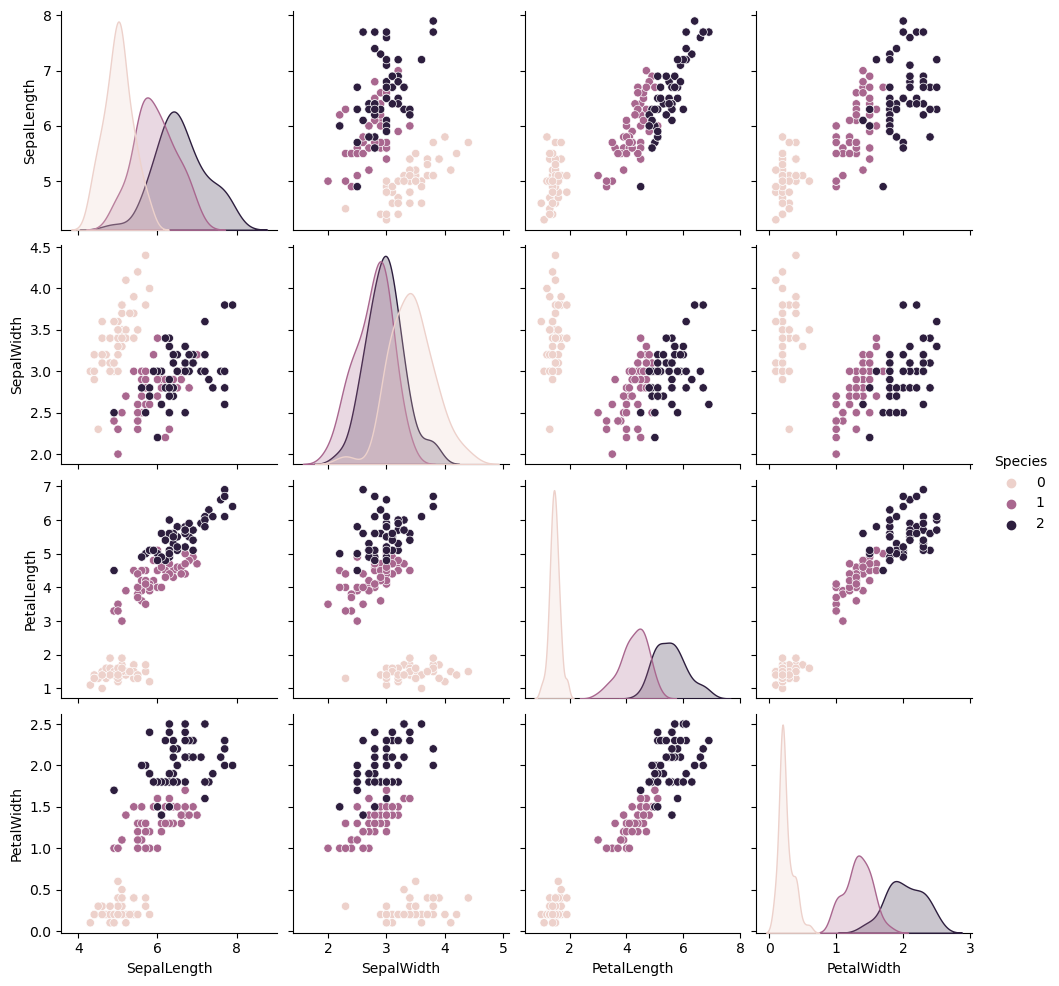

In [14]:
import seaborn as sns
sns.pairplot(data,hue="Species")

- '0' Species class is segregated from other classes.
- SPecies '1' & '2' are overlapping each other.
- So creating classifier based on class 1 & class 2 
- So removing class '0'

In [16]:
optimize_data = data[data['Species'] != 0][['SepalLength','SepalWidth','Species']]

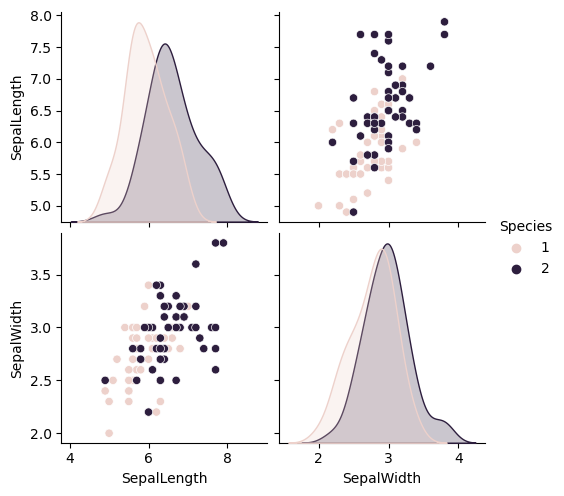

In [17]:
import seaborn as sns
sns.pairplot(optimize_data,hue="Species")

In [36]:
optimize_data.shape

(100, 3)

In [37]:
X = optimize_data.iloc[:,0:2]

In [38]:
y = optimize_data.iloc[:,-1]

In [39]:
X

,SepalLength,SepalWidth
50,7.0,3.2
51,6.4,3.2
52,6.9,3.1
53,5.5,2.3
54,6.5,2.8
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [40]:
y

50     1
51     1
52     1
53     1
54     1
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 100, dtype: int32

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [42]:
from sklearn.model_selection import cross_val_score

In [43]:
clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()
clf3 = KNeighborsClassifier()

In [49]:
estimators = [('LOG',clf1),('DT', clf2),('KNN',clf3)]

In [50]:
estimators[0]

('LOG', LogisticRegression())

In [51]:
estimators[1]

('DT', DecisionTreeClassifier())

In [52]:
estimators[2]

('KNN', KNeighborsClassifier())

In [53]:
for estimator in estimators:
    x = cross_val_score(estimator[1],X,y,cv= 10, scoring = 'accuracy')
    print(estimator[0],np.round(np.mean(x),2))

LOG 0.75
DT 0.54
KNN 0.62


## Hard Voting  [Majority Voting]

In [55]:
from sklearn.ensemble import VotingClassifier

In [56]:
estimators

[('LOG', LogisticRegression()),
 ('DT', DecisionTreeClassifier()),
 ('KNN', KNeighborsClassifier())]

In [57]:
VC = VotingClassifier(estimators=estimators, voting = 'hard')

In [63]:
vca = cross_val_score(VC,X,y,cv= 10, scoring = 'accuracy')

In [64]:
np.round(np.mean(vca),2)

0.67

## Soft Voting [Probability]

In [65]:
VCS = VotingClassifier(estimators=estimators, voting = 'soft')

In [66]:
vcsa = cross_val_score(VCS,X,y,cv= 10, scoring = 'accuracy')

In [67]:
np.round(np.mean(vcsa),2)

0.61

In [ ]:
# Soft classifier is giving me less accuracy than hard classifier.